# MNIST Neural Network

### Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
from NN_database import Database
import pandas as pd

### Load Data and Create Model

In [2]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)


#print(np.shape([1,2,3,4]))

#print(np.shape(x_train)) #(60000,28,28)

#feed forward NN

hidden_units = 200

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hidden_units,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

#could try sparse
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//100

2022-07-19 12:11:14.502667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 12:11:14.508202: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 12:11:14.508493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 12:11:14.509108: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)

#print(np.shape([1,2,3,4]))

#print(np.shape(x_train)) #(60000,28,28)

#feed forward NN

hidden_units = 200

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hidden_units,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

#could try sparse
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//100

#### Decaying Learning Rate Function

In [4]:
# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * math.pow(0.6,epoch), verbose=True)


### Train

In [5]:
#tf.keras.models.Sequential().fit()
model.fit(x_train,y_train,epochs=10,steps_per_epoch = steps_per_epoch)#callbacks=[lr_decay_callback])

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2117 - accuracy: 0.9349
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1012 - accuracy: 0.9688
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9768
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0568 - accuracy: 0.9818
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0512 - accuracy: 0.9837
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0449 - accuracy: 0.9857
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0460 - accuracy: 0.9857
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9893
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0361 - accuracy: 0.9891
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0341 - accuracy: 0.9897

In [6]:
# print model layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (100, 784)                0         
                                                                 
 dense_2 (Dense)             (100, 200)                157000    
                                                                 
 dense_3 (Dense)             (100, 10)                 2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


### Evaluate Loss and Accuracy on Test Set

In [7]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print("loss: ",val_loss,"\n","accuracy: ",val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2202 - accuracy: 0.9654
loss:  0.22018122673034668 
 accuracy:  0.965399980545044


In [8]:
model.save('num_model')

INFO:tensorflow:Assets written to: num_model/assets


In [9]:
new_model = tf.keras.models.load_model('num_model')

In [10]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 770us/step


In [11]:
print(len(x_test))

10000


5


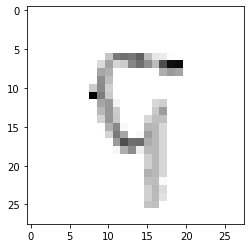

In [12]:
for i in range(len(predictions)):
    if np.argmax(predictions[i])!=y_test[i]:
        print(np.argmax(predictions[i]))
        plt.imshow(x_test[i],cmap=plt.cm.binary)
        break

In [13]:
print(np.argmax(predictions[9876]))

1


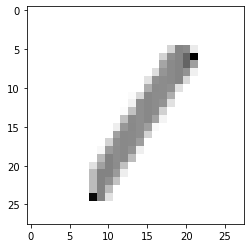

In [14]:
plt.imshow(x_test[9876],cmap=plt.cm.binary)

In [15]:
db = Database()

connection = db.create_db_connection("140.233.160.216", "agironda", "phys_research1", "mnist_db")

select_all_query = "SELECT * FROM mnist"

results = db.read_query(connection,select_all_query)

from_db = []

for result in results:
  result = list(result)
  from_db.append(result)

columns = ["nn_id", "hidden_units", "layers", "training_size", "learning_rate",
            "decay_lr","dropout","dropout_size","epochs","batch_size","loss",
            "metrics","activation","accuracy"]

df = pd.DataFrame(from_db, columns=columns)

display(df)

MySQL Database connection successful


,nn_id,hidden_units,layers,training_size,learning_rate,decay_lr,dropout,dropout_size,epochs,batch_size,loss,metrics,activation,accuracy
0,1,50,1,60000,0.01,1,1,0.25,10,100,sparse_categorical_crossentropy,accuracy,relu,0.9634
1,2,100,1,60000,0.01,1,1,0.25,10,100,sparse_categorical_crossentropy,accuracy,relu,0.9756
2,3,150,1,60000,0.01,1,1,0.25,10,100,sparse_categorical_crossentropy,accuracy,relu,0.9765
3,4,200,1,60000,0.01,1,1,0.25,10,100,sparse_categorical_crossentropy,accuracy,relu,0.9803
4,5,250,1,60000,0.01,1,1,0.25,10,100,sparse_categorical_crossentropy,accuracy,relu,0.9807
5,6,300,1,60000,0.01,1,1,0.25,10,100,sparse_categorical_crossentropy,accuracy,relu,0.9800


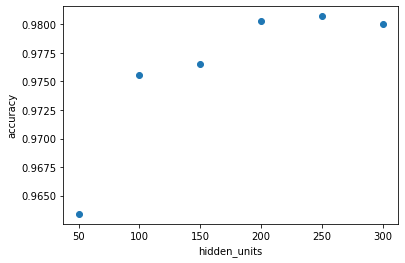

In [16]:
plt.scatter(df["hidden_units"],df["accuracy"])
plt.xlabel("hidden_units")
plt.ylabel("accuracy")
plt.show()

In [2]:
# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * math.pow(0.6,epoch), verbose=True)


mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(kernel_size=3,filters=12,use_bias=False,padding='same'))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv2D(kernel_size=6,filters=24,use_bias=False,padding='same',strides=2))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv2D(kernel_size=6,filters=32,use_bias=False,padding='same',strides=2))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(200,use_bias=False))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//64

model.fit(x_train,y_train,epochs=10,steps_per_epoch = steps_per_epoch,callbacks=[lr_decay_callback])

2022-07-19 12:26:32.174871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 12:26:32.180524: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 12:26:32.180901: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 12:26:32.181846: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10


2022-07-19 12:26:33.563601: E tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded runtime CuDNN library: 8.0.5 but source was compiled with: 8.1.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2022-07-19 12:26:33.564806: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_ops.cc:1120 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'sequential/conv2d/Conv2D' defined at (most recent call last):
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/agironda/.conda/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_12686/3682981142.py", line 42, in <cell line: 42>
      model.fit(x_train,y_train,epochs=10,steps_per_epoch = steps_per_epoch,callbacks=[lr_decay_callback])
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/engine/training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/home/agironda/.local/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 225, in convolution_op
      return tf.nn.convolution(
Node: 'sequential/conv2d/Conv2D'
DNN library is not found.
	 [[{{node sequential/conv2d/Conv2D}}]] [Op:__inference_train_function_1310]

In [ ]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_acc)

In [ ]:
model.save('num_model')

In [ ]:
new_model = tf.keras.models.load_model('num_model')

In [ ]:
predictions = new_model.predict([x_test])

In [ ]:
print(np.argmax(predictions[234]))
plt.imshow(x_test[234],cmap=plt.cm.binary)